
..**New York City AirBnb** <br>
Classification: Hotel-quality listings<br>
Regression: Price<br>
*Bravo, Karba, Kimari, Salsman*

## **Resubmission Changes**

**We are submitting all of the following parts for re-submission grade**

Data Prep Part1: 
<blockquote>Fixed error so now shows df.info for both clf and reg data sets. Scaling was further down in the code and was not counted in grading but now moved to this section. Added a description to what was done for Data Preparation 1.</blockquote>

Data Prep Part2:
<blockquote> For each dataset that was used for classification and regression, I added df.info, I stated what the reponds variables and the features are, and finally I discribed how we were going to use these datasets to solve our problem. 
</blockquote>

Modeling and Evaluation 1:
<blockquote> Under the section New material for Modeling and Evaluation 1, i added why the metrics are appropriate for analyzing the results of our model, and not only why they are useful.</blockquote>

Modeling and Evaluation 2:
<blockquote> Under the section new material for Modeling and Evaluation2, I explained for each data set which cross validation method was used.</blockquote>


Modeling and Evaluation 3:
<blockquote> Previous submission had only accuracy optimized models, new submission also has recall optimized models.Grid searched and hypertuned recall optimizing models for all three classification tasks;Bernoulli Naive Bayes, KNN, Random Forest. </blockquote>

<blockquote> The alpha for the Bernoulli Naive Bayes accuracy model is tuned and the output now displayed. It was not displayed during first submission.</blockquote>

<blockquote> The gridsearch and output for KNN accuracy model was accidentally deleted and now has been fixed. Best estimator and KNN metrics are now visible.</blockquote>

<blockquote>Linear Regression Description of modeling code added. Improper use of Stratified Kfolds changed to plain Kfold cv object for this task.</blockquote>

<blockquote>KNRegressor description of modeling code added. Improper use of Stratified Kfolds changed to plain Kfold cv object for this task.</blockquote>

<blockquote>Random Forest Regressor description of modeling code added. Improper use of Stratified Kfolds changed to plain Kfold cv object for this task.</blockquote>

Modeling and Evaluation 4:
<blockquote>Updated ROC for classifiers and re-wrote the write-up section</blockquote>

<blockquote>Linear Regression visualization of its performance, as well as an assessment of Linear Regression.</blockquote>

<blockquote>KNRegressor visualization of its performance, as well as assessment of the model.</blockquote>

<blockquote>Random Forest Regressor visualization of its performance, as well as assessment of the model.</blockquote>

Modeling and Evaluation 5:

<blockquote>Classifier task comparison is now made for each model for each classifying task. Previously comparisons were made between different tasks,RF classifier and KNN classifier, instead of RF models to each other.</blockquote>
<blockquote>Bernoulli Naive bayes model comparisons and write up added.</blockquote>
<blockquote>Knn model comparisons and write up added.</blockquote>
<blockquote>Random Forest model comparisons and write up added.</blockquote>



Modeling and Evaluation 6:
<blockquote>Moved Random Forest Classifier feature importance graph and description from Modeling and Evaluation 5.</blockquote>
<blockquote>Added Naive Bayes feature importance graph and description.</blockquote>
<blockquote>Feature importance between Naive Bayes classifier and Random Forest classifier write-up added.</blockquote>







# **Data Preparation 1**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')

#preparing data, class
if 'price' in data.columns:
  data['hotel_quality'] = data.price>=300
  data.hotel_quality=data.hotel_quality.astype(np.int)

# imputing reviews_per_month
data = data.transform(lambda grp: grp.fillna(0))  
 
# dummies
if 'burrow_Bronx' not in data.columns:
  burrows = pd.get_dummies(data.neighbourhood_group,prefix='burrow')
  data = pd.concat((data,burrows),axis=1)
if 'hood_Woodside' not in data.columns:
  hood = pd.get_dummies(data.neighbourhood,prefix='hood')
  data = pd.concat((data,hood),axis=1)
if 'type_Private room' not in data.columns:
  roomtype = pd.get_dummies(data.room_type,prefix='type')
  data = pd.concat((data,roomtype),axis=1)  
# removing original dummied features
for item in ['neighbourhood_group','neighbourhood','room_type']:
  if item in data.columns:
    del data[item]
# removing one of dummy variables
if 'burrow_Staten Island' in data:
  del data['burrow_Staten Island']
if 'hood_Allerton' in data:
  del data['hood_Allerton']
if 'type_Shared room' in data:
  del data['type_Shared room']
# reference dummies are burrow:Staten Island, neighborhood: Allerton, room_type: Shared room

# great_listing
data['reviews_per_month']=data['reviews_per_month'].fillna(0)
data['review_rate']=data['reviews_per_month']/30.0+.0001
data['wanted_yr_rate']=(1-data['availability_365']/365.0)
data['great_listing'] = data['review_rate']*data['wanted_yr_rate']
if 'review_rate' in data:
  del data['review_rate']
if 'wanted_yr_rate' in data:
  del data['wanted_yr_rate']


#separate datasets for different prediction tasks
rdata=data.copy()
cdata=data

#CLF: removed columns that are not useful 
for item in ['id','last_review','name','price','host_id','host_name']:
  if item in cdata.columns:
    del cdata[item]
#REG: removed columns that are not useful 
for item in ['id','last_review','name','hotel_quality','host_id','host_name']:#,'reviews_per_month','number_of_reviews','availability_365','great_listing' not sure if its bad we dont take these out
  if item in rdata.columns:
    del rdata[item]

#cdata.info(verbose=True)
#rdata.info(verbose=True)
cdata.info(verbose=True)
rdata.info(verbose=True)

if 'hotel_quality' in cdata.columns:
  yc = cdata['hotel_quality'].values # get the labels we want
  del cdata['hotel_quality'] # get rid of the class label
  Xc = cdata.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xc)
scaled_Xc = scaler.transform(Xc)


if 'price' in rdata.columns:
  yr = rdata['price'].values 
  del rdata['price'] 
  Xr = rdata.values

scaler = StandardScaler()
scaler.fit(Xr)
scaled_Xr = scaler.transform(Xr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 235 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   latitude                         float64
 1   longitude                        float64
 2   minimum_nights                   int64  
 3   number_of_reviews                int64  
 4   reviews_per_month                float64
 5   calculated_host_listings_count   int64  
 6   availability_365                 int64  
 7   hotel_quality                    int64  
 8   burrow_Bronx                     uint8  
 9   burrow_Brooklyn                  uint8  
 10  burrow_Manhattan                 uint8  
 11  burrow_Queens                    uint8  
 12  hood_Arden Heights               uint8  
 13  hood_Arrochar                    uint8  
 14  hood_Arverne                     uint8  
 15  hood_Astoria                     uint8  
 16  hood_Bath Beach                  uint8  
 17  hood_Batter

**NEW MATERIAL**<br>
Description:
1. Created hotel_quality variable for classification tasks. This variable separates the listings by those that are assumed to be of hotel quality and priced as such.
2. Imputed Reviews per month for listings that did not have values, simply 0 suffices.
3. One hot-encode useful class features NYC burrow, neighborhood and room-type. Remove one of each feature to create a values=0 reference.
4. Removed 6 host identifyable, date and target features for classification set.
5. Removed 6 host identifyable, date, and class target features for regression set.
6. Created Target variables for clf/reg and scalled X's for both.

# **Data Preparation 2**

*Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
Modeling and Evaluation 1	10	Choose and explain your evaluation metrics that you will use (i.e., accuracy*

  We have arrived at two datasets for our tasks, classification and regression.

  The feature that was created was <u>great_listing</u>. This is beneficial for both tasks as it takes advantage of guest data such as reviews and availability. It primarily exposes demand for listings, assuming that the majority of hosts will adjust their pricing based on either reviews or lack of availability, exposing in-demand higher priced listings for our classifiers/regressors. This could have been a class with either zero or one, but we felt that a continuous value could be more convincing and informative. 

  For classification of perceived hotel-quality class listings on Airbnb utilized all the useful features following a general idea of how this will be deployed. Features are longitude, latitude, neighborhood, burrow, reviews, availability, room type, and host listings, less price. It is important that price be removed due to the idea that *all* other data should essentially be the deciding factor as to whether a listing is really deserving of a hotel-price averaged listing for New York City.

  The chosen metric(s) of evaluation for classification are.... 

  The regression of price also utilized most features assuming that some of those features will be imputed at deployment, i.e. review features, great_listing, and availability. Other features of coordinates, burrow, neighborhoods will be present at the time of deployment.

  The chosen metrics for evaluation of regression are mean absolute error for gridsearch of models and MAE and RMSE for the chosen models. MAE and RMSE both show magnitude of error in our predictions vs the true response. RMSE was important because it gives greater weight to larger errors. RMSE would show if one model exhibits greater consistency in prediction vs the other.

**New material for Data Preparation 2**

**Classification Final dataset**

In [ ]:
# Df.info for the classification data set
cdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 234 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   latitude                         float64
 1   longitude                        float64
 2   minimum_nights                   int64  
 3   number_of_reviews                int64  
 4   reviews_per_month                float64
 5   calculated_host_listings_count   int64  
 6   availability_365                 int64  
 7   burrow_Bronx                     uint8  
 8   burrow_Brooklyn                  uint8  
 9   burrow_Manhattan                 uint8  
 10  burrow_Queens                    uint8  
 11  hood_Arden Heights               uint8  
 12  hood_Arrochar                    uint8  
 13  hood_Arverne                     uint8  
 14  hood_Astoria                     uint8  
 15  hood_Bath Beach                  uint8  
 16  hood_Battery Park City           uint8  
 17  hood_Bay Ri

**Classification Data description**



1.    Classification **response variable** is Hotel quality. This a variable that is was binned from our price variable. If price > 300 then Hotel quality is encoded as 1, it is 0 otherwise. 300 is determined by the average price for a hotel in NYC.
2.   And the features for classification are  longitude, latitude, neighborhood, burrow, reviews, availability, room type, and host listings, less price.


What we are trying to classify is basically given the features longitude, latitude, neighborhood, burrow, reviews, availability, room type, and host listings, can we predict whether  a listing is really deserving of a hotel-price averaged for New York City


**Note**
Price was removed because the goal is to classify Hotel quality




**Regression Final Data Set**


In [ ]:
rdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 234 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   latitude                         float64
 1   longitude                        float64
 2   minimum_nights                   int64  
 3   number_of_reviews                int64  
 4   reviews_per_month                float64
 5   calculated_host_listings_count   int64  
 6   availability_365                 int64  
 7   burrow_Bronx                     uint8  
 8   burrow_Brooklyn                  uint8  
 9   burrow_Manhattan                 uint8  
 10  burrow_Queens                    uint8  
 11  hood_Arden Heights               uint8  
 12  hood_Arrochar                    uint8  
 13  hood_Arverne                     uint8  
 14  hood_Astoria                     uint8  
 15  hood_Bath Beach                  uint8  
 16  hood_Battery Park City           uint8  
 17  hood_Bay Ri

**Regression Data Description**



1.   The regression **response variable** is price
2.    And the features for classification are  longitude, latitude, neighborhood, burrow, reviews, availability, room type, and host listings, less price.

For this regression problem what we were trying to solve is, given data on longitude, latiude , neighborhood etc, can we predict prices on listings accurately in New York city. Getting a place to lease in newyork is generally expensive, therefore being able to predict prices can help identify listings that are unreasonably priced.




**New Feature**

The feature that was created was great_listing. This is beneficial for both tasks as it takes advantage of guest data such as reviews and availability. It primarily exposes demand for listings, assuming that the majority of hosts will adjust their pricing based on either reviews or lack of availability, exposing in-demand higher priced listings for our classifiers/regressors. This could have been a class with either zero or one, but we felt that a continuous value could be more convincing and informative.


# Modeling and Evaluation

# **Modeling and Evaluation 1**

Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions. 


For classifications the evaluations metrics will be using are:


1.   **Accuracy - Accuracy is used in classification to measure how well we classified true positives and false positives. The calculation is the sum of true positives and false positives divide by the sum of true positives,false positives, false negatives and true negatives. This measure is appropriate for anaylyzing classification models, because we want to know how well ,given different variables, can a model accurately classify a class. Therefore, the higher the accuracy score the better. For example, for our Random forest classifier we got an average accuracy score of about 92% which is a good model.**

2.   **Precision - So Accuracy should not be the only score used to measure a classification model. This is because what if a data scientist is trying to predict if someone has cancer, we want the model to be correct at all times, because incorect classification can lead to unnecessary surgeries. So Precision measures how well a model predicts True Positives. The calculation for Precision is true positive divide by the sum of true positives and false positives** 


3.   **Recall - This metric helps when the cost of miss classifying is high, for example a data scientist wont want to miss classify if someone has cancer or not. However, for our case study, we are predicting whether an area is expenisive or not, therefore the cost is not high. But this is still a good metric to measure. The calculation for Recall is True positive divide by true positives and false negative**

For Regression the Evaluation metrics will be using are
1. **MAE - The MAE is a good model for measuring error in a regression model. How it works, you sum all the absolute errors, and then you divide by the count of data points to get the mean. This good for comparing two regression models,where the model with the lowest MAE is the best. In our case the Random forest has the lowest MAE**

2. **RSME - The RSME is the square root of the sum between the difference of the prediction and actual reponds variables. The difference between the RSME and the MAE is that it focuses on the large errors, which makes it a better meaure than the MAE**.

3. **MAPE - The Mean absolute percentage error, measures how accurate a model can forecast. It measures accuracy as a percentage, and it is calculated by taking the average absolute percent error for each time period minus actual values divided by actual values.**






**New Material for Modeling and Evaluation 1**


**Metrics for our classifiers**

**Accuracy** - Accuracy is used to measure how accurately a model classifies a true positive and a false positive. Therefore in relation to our dataset, true positive is the high quality and false positives is the low quality. We have three classifiers, the one with the highest Accuracy will be our best model

**Precision** - To add on to Accuracy, its good to measure Precision as well. Since we are basically concerned with mostly high quality listings, we want to make sure the classifiers are not missclassifing  high quality listings. Since high quality is our true positive, precision is the optimal measure because it measure how well we classified true positives

**Recall** - This metric measures the cost of miss classifying is high. In relation to our dataset the cost of miss classifying whether is a listing is of high quality is not high, but it would be a good metric to measure against our three model


**Metrics for our Regression Models**

**MAE** - In relation to our datasets, we want our regression models to accurately or closely predict price. MAE can solve this problem because it measures error in regression models. Therefore, best model should be the one with the lowest error in predicting price

**RSME** - Since RSME focuses on large errors , we can use this metric in addition to MAE to compare which models have the lowest large errors in predicting price. Therefore the model with the lowest RSME is the best.


**MAPE** - We also want a good model that can forecast price accurately, because want to be confident that the prices we predicted are good to compare with the different prices in New York City. MAPE is a good metric becasue it measures how accurately a model can forecast. The Model with the highest MAPE is the best.



# **Modeling and Evaluation 2**
 
 Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratiﬁed 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. 


 **We used crossvalidation to reduce bias in our models. So we chose Stratified Kfold, which rearranges the data to make sure it is a good representation of the whole. This good for our models because we have unequal representation of the data for each of our classes, and the best way to represent each data point is by using a stratified Kfold. which shuffles your data, and then after that splits the data into n_splits parts**

**New Material for Modeling and Evaluation 2**

We chose our cross validation based on whether the model was a classifier or regressor:


**Classifier**

The issue with our data is that the distribution of data across our classes is not even, so we have an imbalance problem, please see below:

In [ ]:
df1 = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')
if 'price' in df1.columns:
  df1['hotel_quality'] = df1.price>=300
  df1.hotel_quality=df1.hotel_quality.astype(np.int)


df1.groupby('hotel_quality').count() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
hotel_quality,,,,,,,,,,,,,,,,
0,44977,44963,44977,44957,44977,44977,44977,44977,44977,44977,44977,44977,36280,36280,44977,44977
1,3918,3916,3918,3917,3918,3918,3918,3918,3918,3918,3918,3918,2563,2563,3918,3918


If we did a Kfold, and splitted the data by 10, most likely we would have had a situation where we would be training mostly on lower quality (which is 0 on a our responds variable). We want our training data set to have the best representation of our data. Consquently, the method that will help us solve this problem is StratifiedKFold.

So what is **StratifiedKfold** - It is a crossvalidation method where partition across the classes are held constant. In relation to our dataset since the class labled 0 is 90% of our data and 1 is 10% of our data, Statifiedkfold will keep this distribution constant in our training dataset. This will give us a more reliable estimate of our model.

For our  classification models we used 10 n_splits and we set shuffle to true

**Regressor**


For our regression model, the problem is different. We are predicting price which is a scalar value not a class label like hotel quality. Therefore, the best crossvalidation method is a Kfold  with the parameter  shuffle set to true. The reason we want our shuffle set to be true is so that we have random partitions. This will give us a reliable estimate for our regression models

So for our regression models we decided to use 10 n_splits, and we set the shuffle parameter to true

# **Modeling and Evaluation 3**

# Classification Models

### BernoulliNB

In [ ]:
# JORDAN Naive Bayes
# Top Accuracy Model
import warnings
warnings.filterwarnings("ignore") ## Suppresses User Warning Alpha too small for numeric error
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0)

# Laplace Smoothing parameter
alpha = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3]
# Create the random grid for alphas
params = {'alpha': alpha
          }

Bnb = BernoulliNB()
Bnb_accuracy = RandomizedSearchCV(estimator = Bnb, param_distributions = params, cv = cv)# Fit the random accuracy search model
Bnb_accuracy.fit(scaled_Xc, yc)


from sklearn.model_selection import cross_validate
def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print("The average accuracy for all cv folds is:", Accavg)
    print("The average precision for all cv folds is:", Preavg)
    print("The average recall for all cv folds is:", Recavg)
    
   
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    return scoresResults


#Use the best parameters 
NBclassifierEst = Bnb_accuracy.best_estimator_

#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(NBclassifierEst, scaled_Xc, yc, cv)


The average accuracy for all cv folds is: 0.8251968004631239
The average precision for all cv folds is: 0.23699195266926992
The average recall for all cv folds is: 0.531399733806566
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.823313,0.232426,0.522959
1,0.830266,0.241745,0.522959
2,0.829652,0.242707,0.530612
3,0.819836,0.228031,0.522959
4,0.825358,0.236902,0.530612
5,0.836776,0.250307,0.521739
6,0.821231,0.238919,0.565217
7,0.820209,0.230343,0.530612
8,0.828390,0.241020,0.530612
9,0.816936,0.227519,0.535714


Description:
Use a Bernoulli Naive Bayes classifier since most of the features are binary. Tune the alpha (Laplace Smoothing) parameter to find the model that yields the best estimator ( Accuracy). Use 10 fold Stratified cross validation so results are more trustworthy. Record our three important classifier metrics, Accuracy, Precision, and Recall for our best Accuracy Model.

**New Material:** Recall Bernoulli Naive Bayes hypertuned and cross validated with metrics table

In [ ]:
### Find the model with the best recall score Model
import warnings
warnings.filterwarnings("ignore") ## Suppresses User Warning Alpha too small for numeric error
Bnb = BernoulliNB()
Bnb_recall = RandomizedSearchCV(estimator = Bnb, param_distributions = params, scoring='recall',cv = cv)# Fit the random search model
Bnb_recall.fit(scaled_Xc, yc)

NBclassifierEst = Bnb_recall.best_estimator_

#Evaluate the  estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(NBclassifierEst, scaled_Xc, yc, cv)

The average accuracy for all cv folds is: 0.8204928680511026
The average precision for all cv folds is: 0.23365395549925316
The average recall for all cv folds is: 0.5431402995981001
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.819018,0.227021,0.522959
1,0.824335,0.236158,0.533163
2,0.823517,0.238624,0.548469
3,0.813088,0.224101,0.540816
4,0.823722,0.235955,0.535714
5,0.831458,0.247375,0.542199
6,0.820209,0.238197,0.567775
7,0.819390,0.229923,0.533163
8,0.821027,0.235487,0.548469
9,0.809163,0.223698,0.558673


Description:
Use a Bernoulli Naive Bayes classifier since most of the features are binary. Tune the alpha (Laplace Smoothing) parameter to find the model that yields the best estimator ( Recall). Use 10 fold Stratified cross validation so results are more trustworthy. Record our three important classifier metrics, Accuracy, Precision, and Recall for our best Accuracy Model.

### KNN

In [ ]:
# ANGELO'S KNN CODE
# Find the KNN model with the best accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0)

n_neighbors = [5,10,15] # number of neighbors
weights = ['uniform','distance'] # how to weight the points
metric = ['euclidean','manhattan'] # how to measure distance between points
# Create the random grid
params = {'n_neighbors': n_neighbors,
          'metric': metric,
          'weights': weights
          }

Knn = KNeighborsClassifier()
Knn_accuracy = RandomizedSearchCV(estimator = Knn, param_distributions = params, cv = cv)# Fit the random accuracy search model
Knn_accuracy.fit(scaled_Xc, yc)


from sklearn.model_selection import cross_validate
def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print("The average accuracy for all cv folds is:", Accavg)
    print("The average precision for all cv folds is:", Preavg)
    print("The average recall for all cv folds is:", Recavg)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    return scoresResults


#Use the best parameters
KNNclassifierEst = Knn_accuracy.best_estimator_

#Evaluate the  estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(KNNclassifierEst, scaled_Xc, yc, cv)

The average accuracy for all cv folds is: 0.9241026660994736
The average precision for all cv folds is: 0.6080724983092318
The average recall for all cv folds is: 0.15211584633853542
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.922904,0.574257,0.147959
1,0.925562,0.648936,0.155612
2,0.923313,0.584158,0.150510
3,0.924131,0.617978,0.140306
4,0.924744,0.625000,0.153061
5,0.926774,0.698795,0.148338
6,0.920843,0.518182,0.145780
7,0.923502,0.588235,0.153061
8,0.923297,0.580952,0.155612
9,0.925956,0.644231,0.170918


Description:
A grid search hypertuning of the parameter for different KNN models. The models were cross validated to ensure the results were trustworthy. The model that produced the highest Accuracy was saved as the best parameter model.

In [ ]:
Knn_accuracy.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

The parameters that resulted in the highest accuracy KNN used Manhattan distancing, uniform weights, and had a k =10.

**New Material:** Recall KNN model hypertuned and cross validated with metrics table

In [ ]:
#Find the KNN model with the best Recall
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [5,7,9,11,13] # number of neighbors
metric = ['euclidean','manhattan'] # how to measure distance between points
# Create the random grid
params = {'n_neighbors': n_neighbors,
          'metric': metric
          }
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
Knn = KNeighborsClassifier()
Knn_recall = RandomizedSearchCV(estimator = Knn, param_distributions = params, scoring='recall',cv = cv)# Fit the random search model
Knn_recall.fit(scaled_Xc, yc)

KNNclassifierEst = Knn_recall.best_estimator_

print(Knn_recall.best_estimator_)
#Evaluate the  estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(KNNclassifierEst, scaled_Xc, yc, cv)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
The average accuracy for all cv folds is: 0.9174966765517947
The average precision for all cv folds is: 0.46949598282779154
The average recall for all cv folds is: 0.22001394427502802
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.918601,0.483461,0.242656
1,0.915329,0.440318,0.212005
2,0.918908,0.486068,0.200255
3,0.914715,0.436224,0.218112
4,0.919930,0.501408,0.227041


Description: A grid search was done to find the best Recall score for KNN classifier task. Then that best Recall model was cross validated and scored using our three major metrics.

In [ ]:
Knn_recall.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Description: The best Recall Knn also used Manhattan distancing but this time the Knn had 5 neighbors instead of 10 for the accuracy Knn.

### Random Forest

In [ ]:
# JORDAN random forest Accuracy classification

from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=0)# Fit the random search model
rf_random.fit(scaled_Xc, yc)

rf_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  27.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  28.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  28.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.7min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 262.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Description:
Grid search various parameters for the Random Forest classifier to find the parameter combination which yields the best accuracy. Use stratified K-fold for uneven distribution of classes.

In [ ]:

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0) #make sure to keep same random_state across models

#Display the top model parameters
rf_random.best_estimator_

from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print("The average accuracy for all cv folds is:", Accavg)
    print("The average precision for all cv folds is:", Preavg)
    print("The average recall for all cv folds is:", Recavg)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    return scoresResults

#Use the best parameters
classifierEst = rf_random.best_estimator_


#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, scaled_Xc, yc, cv)


The average precision for all cv folds is: 0.9238981545734528
The average precision for all cv folds is: 0.7729323701708787
The average recall for all cv folds is: 0.07120543869721802
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.924540,0.767442,0.084184
1,0.923108,0.766667,0.058673
2,0.923108,0.710526,0.068878
3,0.923722,0.806452,0.063776
4,0.924744,0.800000,0.081633
5,0.923706,0.764706,0.066496
6,0.922070,0.638889,0.058824
7,0.925752,0.891892,0.084184
8,0.923706,0.787879,0.066327
9,0.924524,0.794872,0.079082


Description:
10 fold K-stratified cross validation of our best accuracy Random Forest classifier from our hypertuning. Calculated and display our three major metrics for classification, Accuracy, Precision, and Recall.

**New Material: **Recall Random Forest Model hypertuned and cross validated with metrics table

In [ ]:
# JORDAN random forest Recall classification Hypertuning

from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_recall = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='recall', n_iter = 50, cv = 3, verbose=2, random_state=0)# Fit the random search model
rf_recall.fit(scaled_Xc, yc)

rf_recall.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  24.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  25.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  25.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.3min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.5min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 233.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Description: Grid search various parameters for the Random Forest classifier to find the parameter combination which yields the best recall. Use stratified k-fold for uneven distribution of classes


In [ ]:
## Create Recall RF Table
#Use the best parameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0)
def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print("The average accuracy for all cv folds is:", Accavg)
    print("The average precision for all cv folds is:", Preavg)
    print("The average recall for all cv folds is:", Recavg)
    
   
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    return scoresResults


classifierEst = rf_recall.best_estimator_


#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, scaled_Xc, yc, cv)

The average accuracy for all cv folds is: 0.922977858980617
The average precision for all cv folds is: 0.5472975498889184
The average recall for all cv folds is: 0.22537058301581503
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.920450,0.508876,0.219388
1,0.922904,0.547771,0.219388
2,0.921268,0.521212,0.219388
3,0.921881,0.534247,0.198980
4,0.925971,0.589286,0.252551
5,0.924115,0.565789,0.219949
6,0.923093,0.544910,0.232737
7,0.921456,0.525641,0.209184
8,0.924934,0.583893,0.221939
9,0.923706,0.551351,0.260204


Description:
10 fold K-stratified cross validation of our best Recall Random Forest classifier from our hypertuning. Calculated and display our three major metrics for classification, Accuracy, Precision, and Recall.

In [ ]:
#### Hard Coding in the best classifying RF and KNN models so hypertuning does not need to be re-run each session.
### The parameters are copy and pasted from the output above in each respected model.
### cuts down on time since hypertuning takes hours and helps us utilize our best models for plotting and comparing.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

RF_accuracy = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RF_recall = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Knn_accuracy = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Knn_recall = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')




# Regression

### Linear Regression

In [ ]:
# THOMAS'S CODE: Linear Regression


from sklearn.model_selection import KFold
cv = KFold(n_splits=2,shuffle=True,random_state=25)


parameters = { 'fit_intercept':[True,False],
              'normalize': [True,False],}

from sklearn.metrics import mean_absolute_error

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
regGridSearch = GridSearchCV(estimator=LinearRegression()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='neg_mean_absolute_error')

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

regGridSearch.fit(Xr_scale, yr)

#Display the top model parameters
regGridSearch.best_estimator_






from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 








from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

#Use the best parameters for our Linear Regression object
regressionEst = regGridSearch.best_estimator_

cv = KFold(n_splits=10,shuffle=True,random_state=25)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regressionEst, Xr_scale, yr, cv)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    8.0s finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-package

The average MAE for all cv folds is: 			 2.083e+12
The average MAE percentage (MAPE) for all cv folds is: 	 2.3374e+12
The average RMSE for all cv folds is: 			 1.4565e+14
*********************************************************
Cross Validation Fold Mean Error Scores


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


,MAE,MAPE,RMSE
0,7.111330e+01,5.152457e+01,2.375898e+02
1,1.349203e+12,1.928222e+11,9.434781e+13
2,9.226249e+11,3.706837e+11,6.451780e+13
3,7.206373e+01,5.050810e+01,2.617477e+02
4,2.562583e+12,3.416778e+12,1.791977e+14
5,6.655362e+01,5.063035e+01,1.564452e+02
6,7.268519e+01,5.218904e+01,2.570636e+02
7,2.408621e+11,4.226515e+11,1.684141e+13
8,1.469418e+13,1.883869e+13,1.027437e+15
9,1.060987e+12,1.326776e+11,7.418567e+13


Description:<br>Linear Regression is simpler model that was tested first using all possible parameters using GridSearch and then cross validated with 10 folds and random state of 25. The results are rather bad, telling us more complex algorithms will be needed to predict price.

### KnieghborRegression

In [ ]:
# THOMAS'S CODE: Kneighbors Regression

from sklearn.model_selection import KFold
cv = KFold(n_splits=2,shuffle=True,random_state=25)

parameters = { 
    'n_neighbors':[15,21,35],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    }

from sklearn.metrics import mean_absolute_error

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kregGridSearch = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1)
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv
                   , scoring='neg_mean_absolute_error')

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

kregGridSearch.fit(Xr_scale, yr)

#Top model parameters
kregGridSearch.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 47.2min finished


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                    weights='uniform')

Description: Code for GridSearch enacted using various neighbors and algorithms.

In [ ]:
kregGridSearch.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                    weights='uniform')

Description: Best estimator printed for reference.(from Grid Search)

In [ ]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 

from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

Description: Metrics function from Jake Drew added to code.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#Use the best parameters for our KNeighbors Regression object
regressionEst = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                    weights='uniform')

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0)

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

from sklearn.model_selection import KFold
cv = KFold(n_splits=10,shuffle=True,random_state=25)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regressionEst, Xr_scale, yr, cv)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipyke

The average MAE for all cv folds is: 			 67.741
The average MAE percentage (MAPE) for all cv folds is: 	 46.241
The average RMSE for all cv folds is: 			 224.76
*********************************************************
Cross Validation Fold Mean Error Scores


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


,MAE,MAPE,RMSE
0,71.270377,48.468706,262.111757
1,68.436518,44.913267,245.827601
2,69.517119,46.572619,248.556605
3,68.227120,45.708613,248.251583
4,66.736664,46.120517,236.731995
5,68.101705,46.079039,214.460698
6,69.235933,48.915945,181.514139
7,64.992617,44.539502,177.600519
8,65.546494,47.274605,201.066196
9,65.348742,43.817276,231.495057


Description: <br>
Scaled data was passed through a cv object 10 fold, random state same as regressor 1 and fit with the best estimator of GridSearch. All metrics are a significant improvement over Linear Regression, though the runtime was significantly longer as algorithm is quite costly and took a very long time to run.

## Random Forest Regressor

In [ ]:
%time
# Muchigi's CODE: Randomforest Regressor


from sklearn.model_selection import KFold
cv = KFold(n_splits=2,shuffle=True,random_state=25)

parameters = {'bootstrap': [True, False],
              'max_depth': [3,5,10, None],
              'max_features': ['auto', 'sqrt'],
              #'min_samples_leaf': [1, 2, 4],
              #'min_samples_split': [2, 5, 10]
              }

from sklearn.metrics import mean_absolute_error

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regGridSearch = GridSearchCV(estimator=RandomForestRegressor()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='neg_mean_absolute_error')

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

regGridSearch.fit(Xr_scale, yr)

#Display the top model parameters
regGridSearch.best_estimator_


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  32 out of  32 | elapsed:  8.7min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Description: Grid Search enacted on Random Forest to find best estimator for data.

In [ ]:
regGridSearch.best__estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Description: Best estimator from Grid Search printed for reference.

In [ ]:

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 

from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))
 
    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults



Description: Scoring function from Jake Drew run for next cell.

In [ ]:
#Use the best parameters for our Linear Regression object
regressionEst = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

from sklearn.model_selection import KFold
cv = KFold(n_splits=10,shuffle=True,random_state=25)

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regressionEst, Xr_scale, yr, cv)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWa

The average MAE for all cv folds is: 			 64.363
The average MAE percentage (MAPE) for all cv folds is: 	 43.519
The average RMSE for all cv folds is: 			 219.02
*********************************************************
Cross Validation Fold Mean Error Scores


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


,MAE,MAPE,RMSE
0,66.231644,44.407842,252.094241
1,64.616357,41.724763,229.937767
2,64.718680,42.538787,235.742044
3,65.712165,43.480187,244.325200
4,63.640747,45.102403,228.700820
5,65.595276,43.662350,215.620804
6,66.240679,45.880849,181.669646
7,62.131579,42.116076,180.069449
8,61.872234,44.170205,196.326764
9,62.874703,42.109759,225.747987


Description: A gridsearch was performed to find best estimator for RandomForest Regressor. 10 fold cv with same random state as other regressors used on final estimator and best results yet are output.

# **Modeling And Evaluation 4**


#### Visualization of Classifiers

**New Material:** ROC plot with additional classifier models that were produced in modeling and evaluation 3 New write up

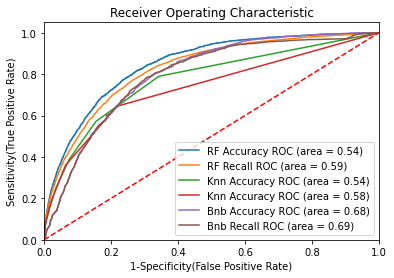

In [ ]:

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np  
import pandas as pd  
import seaborn as sns  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_roc_curve 
from sklearn import datasets, metrics, model_selection

x_train, x_test, y_train, y_test = train_test_split(scaled_Xc, yc, test_size=.75,
                                                    random_state=0)#Split data manually since there is no cv performed

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'RF Accuracy',
    'model': RF_accuracy,
},
{
    'label': 'RF Recall',
    'model': RF_recall,
},
{
    'label': 'Knn Accuracy',
    'model': Knn_accuracy,
},
{
    'label': 'Knn Accuracy',
    'model': Knn_recall,
},
{
    'label': 'Bnb Accuracy',
    'model': Bnb_accuracy.best_estimator_,
},
{
    'label': 'Bnb Recall',
    'model': Bnb_recall.best_estimator_,
}

]
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Our goal for classifying is to accurately and with good recall and precision classify hotel_listing, a variable that bins price into 1 if the Air-bnb is pricier than the average NYC hotel and 0 if it is not. While accuracy is most important recall and precision are also important because we would like to not miss an opportunity to correctly classify when a pricing is higher than the average hotel (recall).

 Comparing all 6 of our classifying models we can see that both Random forest models perform better than either KNN or BNB classifiers. Since we are measuring accuracy, recall, and precision we would like the curves of the lines to go up and then to the right. This would indicate, based on the x and y axis, that those classifiers have better sensitivity (recall) and specificity.

 It is interesting to note that it does appear that the Bernoulli naive Bayes, based on the ROC plot is outperforming our KNN task in each model.

 Since our dataset is heavliy skewed, most Air-bnb pricing is below the average hotel pricing, we are seeing that the KNN is overpredicting everything to low, or 0. 

#### Visualization of LinReg

Text(0.5, 1.0, 'Actuals vs Regression Line')

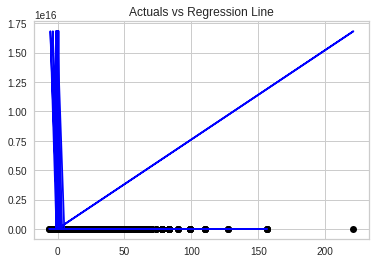

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

#scaled_Xr , yr

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(scaled_Xr, yr, test_size=0.2, random_state=42)

reg = LinearRegression(fit_intercept=True,normalize=True).fit(X_train,y_train)

#Generated Predictions
y_predicted = reg.predict(X_test)
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test,y_predicted,color='blue')
plt.title("Actuals vs Regression Line")

Description: The visuals indicate this simple model is not adequate in predicting price and echos the stark error metrics.

Assessment: Though the model performs very quickly on sizeable dataset the algorithm is not complex enough to capture the variation of the Airbnb data in NYC.The problem is the diagonal line that seems to unify and average values that can be very different along the axes.

#### Visualization of KNRegressor

Text(0.5, 1.0, 'Actuals vs Regression Line')

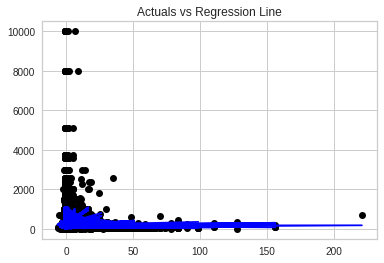

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt

#scaled_Xr , yr

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(scaled_Xr, yr, test_size=0.2, random_state=42)

reg = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                    weights='uniform').fit(X_train,y_train)

#Generated Predictions
y_predicted = reg.predict(X_test)
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test,y_predicted,color='blue')
plt.title("Actuals vs Regression Line")

Description: A much cleaner fitting of Data as with LinReg. The Kneighbor Regressor really molds itself to the data for most of the values. Above 2000 the regressor seemed to struggle. These values are the lower range of priced listings that contain a lot more variation and less success most likely in having guests. Since there is no guard at Airbnb for overpricing listings or removal of inactive listings these are arguably not as relevant.

Assessment: The KNRegressor is quite costly but performs considerable better than a simple Linear Regression. It molds to the data though still has limitations of Nearest Neighbor that may not capture enough of all the variation present in the data. Solid performance and desireable if Airbnb had limits on pricing for listings.

### Visualization of Random Forest Regressor

Text(0.5, 1.0, 'Actuals vs Regression Line')

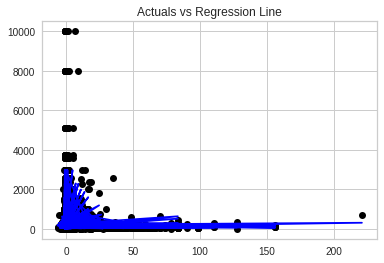

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False).fit(X_train,y_train)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt

#scaled_Xr , yr

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(scaled_Xr, yr, test_size=0.2, random_state=42)

#Generated Predictions
y_predicted = reg.predict(X_test)
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test,y_predicted,color='blue')
plt.title("Actuals vs Regression Line")

Description: Even better visualizations, show better coverage of data points for the lower rung of listings. The blue line fittings show greater attention to variation of the data for values up to 3000. 

Assessment: The RF regressor is very fast, captures even more of the variation in data than the other regressors. It is the most flexible and it shows in the visualization and metrics. THe only issue with a RF regressor is that there are still some values that are not captured. Being the best regressor thus far, it would be chosen for deployment. 

# **Modeling and Evaluation 5**


**New Material:**Bernoulli accuracy to recall comparisons, with paired t-tests and write-up 

---

previously this section had only RF to KNN accuracy comparisons and was deleted.

## Bernoulli Model Comparisons
The classification task seeked to classify the price of an Air-Bnb into either high or low based on different listing attributes.

The first classifier we built was a Bernoulli Naive Bayes. The advantage of this classifier was that it is simple and easily computed since it is using supervised learning based on probabilities easily calculated from the data. The BNB model classifier that was chosen as the best accuracy estimator was with alpha = 1.3, which produced the highest accuracy. While overall accuracy is our main goal we are also interested in recall which gives us a good indication into how our well our model is correctly identifying places with "high" prices. The alpha for the model with the best recall score was alpha = 0

In [ ]:
print('Best Accuracy Model',Bnb_accuracy.best_estimator_)
print('Best Recall Model', Bnb_recall.best_estimator_)

Best Accuracy Model BernoulliNB(alpha=1.3, binarize=0.0, class_prior=None, fit_prior=True)
Best Recall Model BernoulliNB(alpha=0, binarize=0.0, class_prior=None, fit_prior=True)


In [ ]:
### Compare best accuracy Bernoulli model with best recall Bernoulli model
import warnings
warnings.filterwarnings("ignore") ## Suppresses User Warning Alpha too small for numeric error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0) #make sure to keep same random_state across models

def EvaluateClassifierEstimator(classifierEstimator1, classifierEstimator2, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator1, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)
    scores2 = cross_validate(classifierEstimator2, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    Accavg2 = scores2['test_accuracy'].mean()
    Preavg2 = scores2['test_precision'].mean()
    Recavg2 = scores2['test_recall'].mean()

    print("The average Best Accuracy model accuracy for all cv folds is:", Accavg)
    print("The average Best Accuracy model precision for all cv folds is:", Preavg)
    print("The average Best Accuracy model recall for all cv folds is:", Recavg)

    print("The average Best Recall model accuracy for all cv folds is:", Accavg2)
    print("The average Best Recall model precision for all cv folds is:", Preavg2)
    print("The average Best Recall model recall for all cv folds is:", Recavg2)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Best Accuracy Model Accuracy'] = scores['test_accuracy']
    scoresResults['Best Recall Model Accuracy'] = scores2['test_accuracy']
    scoresResults['Best Accuracy Model Precision'] = scores['test_precision']
    scoresResults['Best Recall Model Precision'] = scores2['test_precision']
    scoresResults['Best Accuracy Model Recall'] = scores['test_recall']
    scoresResults['Best Recall Model Recall'] = scores2['test_recall']
    return scoresResults
classifierEst1 = Bnb_accuracy
classifierEst2 = Bnb_recall

#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst1, classifierEst2, scaled_Xc, yc, cv)

The average Best Accuracy model accuracy for all cv folds is: 0.8251763505653734
The average Best Accuracy model precision for all cv folds is: 0.23696563032455248
The average Best Accuracy model recall for all cv folds is: 0.531399733806566
The average Best Recall model accuracy for all cv folds is: 0.8207996332487145
The average Best Recall model precision for all cv folds is: 0.23403683809646042
The average Best Recall model recall for all cv folds is: 0.5431402995981001
*********************************************************
Cross Validation Fold Mean Error Scores


,Best Accuracy Model Accuracy,Best Recall Model Accuracy,Best Accuracy Model Precision,Best Recall Model Precision,Best Accuracy Model Recall,Best Recall Model Recall
0,0.823108,0.821268,0.232163,0.229821,0.522959,0.522959
1,0.830266,0.824335,0.241745,0.236158,0.522959,0.533163
2,0.829652,0.823517,0.242707,0.238624,0.530612,0.548469
3,0.819836,0.813088,0.228031,0.224101,0.522959,0.540816
4,0.825358,0.823722,0.236902,0.235955,0.530612,0.535714
5,0.836776,0.831458,0.250307,0.247375,0.521739,0.542199
6,0.821231,0.820618,0.238919,0.238710,0.565217,0.567775
7,0.820209,0.819390,0.230343,0.229923,0.530612,0.533163
8,0.828390,0.821436,0.241020,0.236004,0.530612,0.548469
9,0.816936,0.809163,0.227519,0.223698,0.535714,0.558673


As you can see there is not much deviation between the two Bernoulli Naive Bayes models. The Best Accuracy model does appear to have slightly better accuracy and also precision. while the Best Recall model has the best Recall. Next paired t-tests will be run on all three metrics to determine if there is any significant difference between these two models.

In [ ]:
import warnings
warnings.filterwarnings("ignore") ## Suppresses User Warning Alpha too small for numeric error
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1= Bnb_accuracy,####ACCURACY
                          estimator2= Bnb_recall, scoring='accuracy',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t2, p2 = paired_ttest_5x2cv(estimator1= Bnb_accuracy,####PRECISION
                          estimator2= Bnb_recall, scoring='precision',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t3, p3 = paired_ttest_5x2cv(estimator1= Bnb_accuracy,####RECALL
                          estimator2= Bnb_recall, scoring='recall',
                          X=scaled_Xc, y=yc,
                          random_seed=0)
print('ACCURACY')
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
print('-------------------------------------------')
print('PRECISION')
print('t statistic: %.3f' % t2)
print('p value: %.3f' % p2)
print('-------------------------------------------')
print('RECALL')
print('t statistic: %.3f' % t3)
print('p value: %.3f' % p3)

ACCURACY
t statistic: 1.932
p value: 0.111
-------------------------------------------
PRECISION
t statistic: 2.080
p value: 0.092
-------------------------------------------
RECALL
t statistic: -3.314
p value: 0.021


At a alpha =.05 level, we can conclude that the difference in Accuracy and Precision between the two models are not statistically significant. The difference in Recall, however, is significant at alpha =.05, meaning the optimized Recall model does produce a statistically significantly better recall score. 

So the advantages for the Accuracy optimized model is that we have a slight increase in both Accuracy and Precision, though not statistically significant from our Recall optimized model. The advantage of our Recall optimized model is a statistically better Recall score but lower overall accuracy and precision.

We would conclude that the recall optimizing model is our better model for the Bernoulli Naive Bayes classification task. Even though it produces slightly worse overall accuracy and precision scores, the recall score is significantly better. It is important to us to be able to confidently predict when a posting is a 'higher' price so people understand the level to which they may have to pay. We would rather more consistently get it right when the posting is listed as "High" even at a cost of slightly lower accuracy. 

## Knn Model Comparisons

**New Material:**KNN accuracy to KNN recall comparisons, with paired t-tests and write-up 

---

previously this section had only RF to KNN accuracy model comparisons and was deleted.

In [ ]:
# Displaying the hard coded models which are equal to the .best_params_ of the grid search object without needing
# to re-run the grid search.
print("Best accuracy Knn Model", Knn_accuracy)
print("Best recall Knn Model",Knn_recall)

Best accuracy Knn Model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Best recall Knn Model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


The accuracy optimizing Knn grid search produced a Knn model that had uniform weight, Manhattan distancing and 10 nearest neighbors that are used to determine which way price is classified, "high" or "low".

The recall optimizing Knn model is nearly identical to the accuracy model except that it uses 5 nearest neighbors instead of 10 to make it's classification. 

In [ ]:
# Compare best accuracy KNN model to best recall KNN model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0) #make sure to keep same random_state across models

def EvaluateClassifierEstimator(classifierEstimator1, classifierEstimator2, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator1, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)
    scores2 = cross_validate(classifierEstimator2, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    Accavg2 = scores2['test_accuracy'].mean()
    Preavg2 = scores2['test_precision'].mean()
    Recavg2 = scores2['test_recall'].mean()

    print("The average Best Accuracy model accuracy for all cv folds is:", Accavg)
    print("The average Best Accuracy model precision for all cv folds is:", Preavg)
    print("The average Best Accuracy model recall for all cv folds is:", Recavg)

    print("The average Best Recall model accuracy for all cv folds is:", Accavg2)
    print("The average Best Recall model precision for all cv folds is:", Preavg2)
    print("The average Best Recall model recall for all cv folds is:", Recavg2)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Best Accuracy Model Accuracy'] = scores['test_accuracy']
    scoresResults['Best Recall Model Accuracy'] = scores2['test_accuracy']
    scoresResults['Best Accuracy Model Precision'] = scores['test_precision']
    scoresResults['Best Recall Model Precision'] = scores2['test_precision']
    scoresResults['Best Accuracy Model Recall'] = scores['test_recall']
    scoresResults['Best Recall Model Recall'] = scores2['test_recall']
    return scoresResults
classifierEst1 = Knn_accuracy
classifierEst2 = Knn_recall

#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst1, classifierEst2, scaled_Xc, yc, cv)

The average Best Accuracy model accuracy for all cv folds is: 0.9241026660994736
The average Best Accuracy model precision for all cv folds is: 0.6080724983092318
The average Best Accuracy model recall for all cv folds is: 0.15211584633853542
The average Best Recall model accuracy for all cv folds is: 0.9180898649403255
The average Best Recall model precision for all cv folds is: 0.4782710020897428
The average Best Recall model recall for all cv folds is: 0.2289420115872436
*********************************************************
Cross Validation Fold Mean Error Scores


,Best Accuracy Model Accuracy,Best Recall Model Accuracy,Best Accuracy Model Precision,Best Recall Model Precision,Best Accuracy Model Recall,Best Recall Model Recall
0,0.922904,0.917178,0.574257,0.467662,0.147959,0.239796
1,0.925562,0.919427,0.648936,0.494845,0.155612,0.244898
2,0.923313,0.914519,0.584158,0.433673,0.150510,0.216837
3,0.924131,0.917178,0.617978,0.464088,0.140306,0.214286
4,0.924744,0.918200,0.625000,0.477528,0.153061,0.216837
5,0.926774,0.922888,0.698795,0.544304,0.148338,0.219949
6,0.920843,0.916752,0.518182,0.459596,0.145780,0.232737
7,0.923502,0.915934,0.588235,0.452261,0.153061,0.229592
8,0.923297,0.918797,0.580952,0.486188,0.155612,0.224490
9,0.925956,0.920025,0.644231,0.502564,0.170918,0.250000


The best accuracy Knn model has only a slightly better average accuracy score than the best recall KNN model (.924 to .918). However the best accuracy KNN model has a considerably higher precision score than the best recall KNN (.608 to .478). Finally the best recall KNN model does have the higher Recall score, (.152 to .229) however this difference is definitely less than the difference in precision. 

The advantages for the best accuracy model are an ever so slightly higher accuracy score, and a considerably higher precision score but it is at a decent disadvantage in recall to our Recall optimized model.

Next we will run paired to tests on all three metrics to see if any of these differences are statistically significant at alpha = .05. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1= Knn_accuracy,####ACCURACY
                          estimator2= Knn_recall, scoring='accuracy',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t2, p2 = paired_ttest_5x2cv(estimator1= Knn_accuracy,####PRECISION
                          estimator2= Knn_recall, scoring='precision',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t3, p3 = paired_ttest_5x2cv(estimator1= Knn_accuracy,####RECALL
                          estimator2= Knn_recall, scoring='recall',
                          X=scaled_Xc, y=yc,
                          random_seed=0)
print('ACCURACY')
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
print('-------------------------------------------')
print('PRECISION')
print('t statistic: %.3f' % t2)
print('p value: %.3f' % p2)
print('-------------------------------------------')
print('RECALL')
print('t statistic: %.3f' % t3)
print('p value: %.3f' % p3)

ACCURACY
t statistic: 16.327
p value: 0.000
-------------------------------------------
PRECISION
t statistic: 6.272
p value: 0.002
-------------------------------------------
RECALL
t statistic: -7.934
p value: 0.001


The accuracy Knn model has both a statisitically significant accuracy and precision score. It has a very significant accuracy  with p <.001. The recall optimizing score is significantly better for the recall Knn model at p = .001. However, we implement our Knn accuracy model because of the sizable advantage in accuracy, our most important metric while also getting a major increase in Precision as well.

## Random Forest Model Comparisons

**New Material:**Random Forest accuracy to recall comparisons, with paired t-tests and write-up 

---

previously this section had only RF to KNN accuracy comparisons and was deleted.

In [ ]:
# Displaying the hard coded models which are equal to the .best_params_ of the grid search object without needing
# to re-run the grid search.
print("Best accuracy RF Model", RF_accuracy)
print("Best recall RF Model",RF_recall)

Best accuracy RF Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best recall RF Model RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_es

The two RF classifier models are both similar but differ in the min sample splits, which is the number of minimal samples required to split at a node. The max depth is also different, which is how far down the tree is permitted to go.

In [ ]:
#Compare best accuracy RF model to best recall RF model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0) #make sure to keep same random_state across models

def EvaluateClassifierEstimator(classifierEstimator1, classifierEstimator2, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator1, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)
    scores2 = cross_validate(classifierEstimator2, scaled_Xc, yc, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    Accavg2 = scores2['test_accuracy'].mean()
    Preavg2 = scores2['test_precision'].mean()
    Recavg2 = scores2['test_recall'].mean()

    print("The average Best Accuracy model accuracy for all cv folds is:", Accavg)
    print("The average Best Accuracy model precision for all cv folds is:", Preavg)
    print("The average Best Accuracy model recall for all cv folds is:", Recavg)

    print("The average Best Recall model accuracy for all cv folds is:", Accavg2)
    print("The average Best Recall model precision for all cv folds is:", Preavg2)
    print("The average Best Recall model recall for all cv folds is:", Recavg2)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Best Accuracy Model Accuracy'] = scores['test_accuracy']
    scoresResults['Best Recall Model Accuracy'] = scores2['test_accuracy']
    scoresResults['Best Accuracy Model Precision'] = scores['test_precision']
    scoresResults['Best Recall Model Precision'] = scores2['test_precision']
    scoresResults['Best Accuracy Model Recall'] = scores['test_recall']
    scoresResults['Best Recall Model Recall'] = scores2['test_recall']
    return scoresResults
classifierEst1 = RF_accuracy
classifierEst2 = RF_recall

#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst1, classifierEst2, scaled_Xc, yc, cv)

The average Best Accuracy model accuracy for all cv folds is: 0.927150010394354
The average Best Accuracy model precision for all cv folds is: 0.7116513284277919
The average Best Accuracy model recall for all cv folds is: 0.15415601023017902
The average Best Recall model accuracy for all cv folds is: 0.9234277776453211
The average Best Recall model precision for all cv folds is: 0.5547037025087548
The average Best Recall model recall for all cv folds is: 0.22690119526071295
*********************************************************
Cross Validation Fold Mean Error Scores


,Best Accuracy Model Accuracy,Best Recall Model Accuracy,Best Accuracy Model Precision,Best Recall Model Precision,Best Accuracy Model Recall,Best Recall Model Recall
0,0.926789,0.920041,0.666667,0.502924,0.173469,0.219388
1,0.926585,0.923517,0.694118,0.553571,0.150510,0.237245
2,0.925971,0.922699,0.670455,0.543750,0.150510,0.221939
3,0.927403,0.922904,0.760563,0.553957,0.137755,0.196429
4,0.929243,0.926789,0.767442,0.604938,0.168367,0.250000
5,0.928615,0.923502,0.769231,0.554140,0.153453,0.222506
6,0.924524,0.923706,0.627907,0.555556,0.138107,0.230179
7,0.928615,0.922274,0.772152,0.538462,0.155612,0.214286
8,0.925752,0.925138,0.670588,0.586667,0.145408,0.224490
9,0.928002,0.923706,0.717391,0.553073,0.168367,0.252551


Once again in our classifiers we see that the Accuracy RF model outperforms the Recall RF model in both accuracy and precision while the recall RF model has the advantage in recall score. A paired t-test is run to test the statistical significance between these metrics

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1= RF_accuracy,####ACCURACY
                          estimator2= RF_recall, scoring='accuracy',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t2, p2 = paired_ttest_5x2cv(estimator1= RF_accuracy,####PRECISION
                          estimator2= RF_recall, scoring='precision',
                          X=scaled_Xc, y=yc,
                          random_seed=0)

t3, p3 = paired_ttest_5x2cv(estimator1= RF_accuracy,####RECALL
                          estimator2= RF_recall, scoring='recall',
                          X=scaled_Xc, y=yc,
                          random_seed=0)
print('ACCURACY')
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
print('-------------------------------------------')
print('PRECISION')
print('t statistic: %.3f' % t2)
print('p value: %.3f' % p2)
print('-------------------------------------------')
print('RECALL')
print('t statistic: %.3f' % t3)
print('p value: %.3f' % p3)

ACCURACY
t statistic: 5.442
p value: 0.003
-------------------------------------------
PRECISION
t statistic: 5.422
p value: 0.003
-------------------------------------------
RECALL
t statistic: -7.035
p value: 0.001


From the tests for significance we can see that the accuracy RF model is significantly better, at alpha = .05, in both the accuracy and precision metrics(p=.03,p=.03). The recall score is however significantly better for the Recall RF model. Once again though we would implement the accuracy RF model as it has the advantage in two of our major metrics. 

# **Modeling and Evaluation 6**



In [ ]:

!pip install -U yellowbrick

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


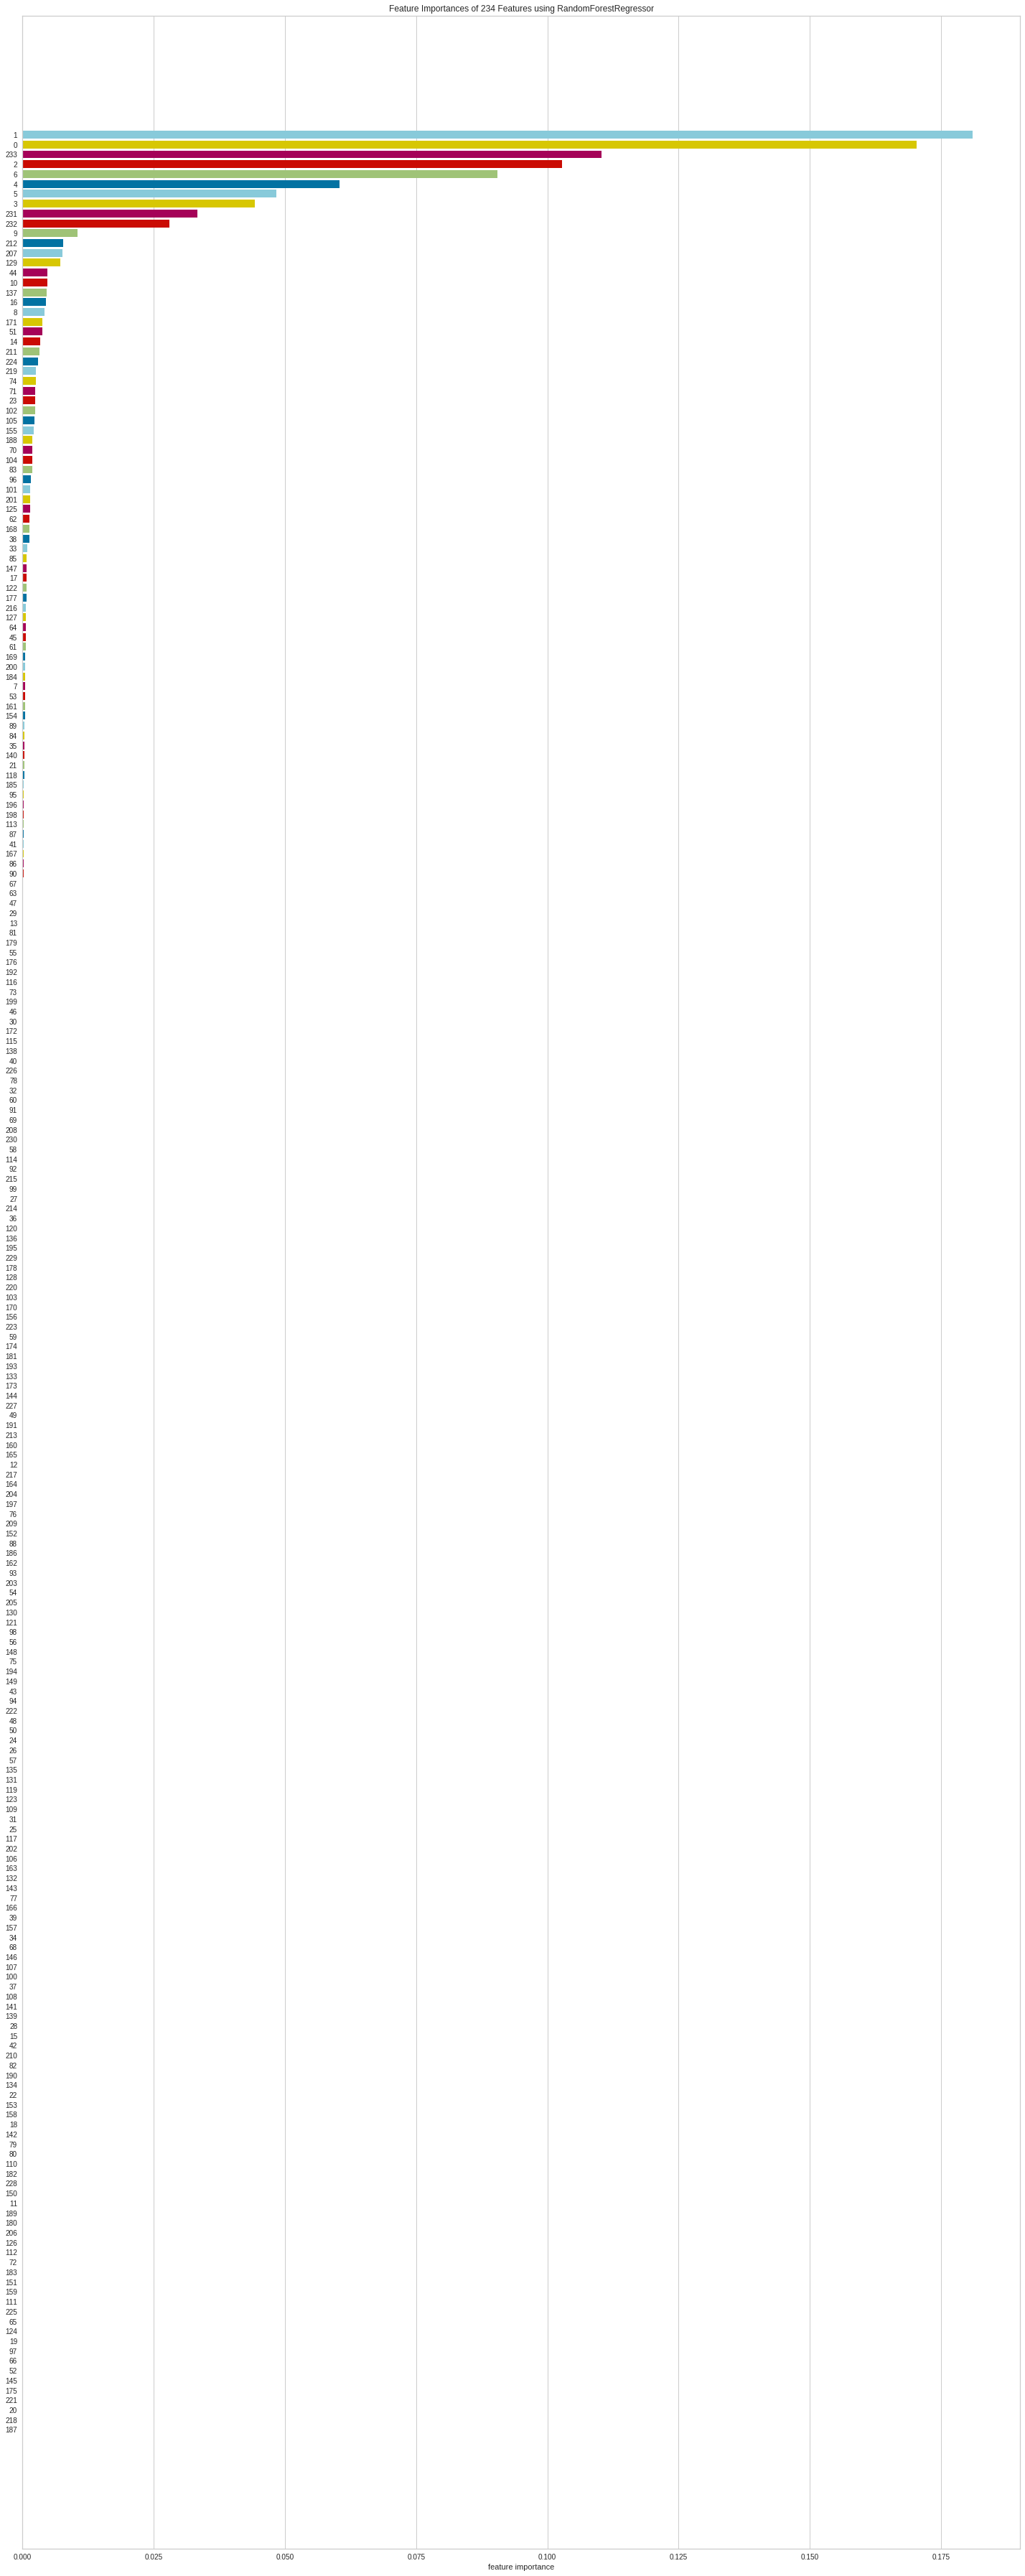

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

from sklearn.preprocessing import StandardScaler
#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(Xr)
Xr_scale = scaler.transform(Xr)

model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)

viz = FeatureImportances(model, relative=False,ax=ax)
viz.fit(Xr_scale, yr)
viz.show()





In [ ]:
col_list = rdata.columns
count = 1
for col in col_list[[1,0,233,2,6,4,5,3,231,232]]:
  print('The #',count,'feature is ',col)
  count += 1



The # 1 feature is  longitude
The # 2 feature is  latitude
The # 3 feature is  great_listing
The # 4 feature is  minimum_nights
The # 5 feature is  availability_365
The # 6 feature is  reviews_per_month
The # 7 feature is  calculated_host_listings_count
The # 8 feature is  number_of_reviews
The # 9 feature is  type_Entire home/apt
The # 10 feature is  type_Private room


**For our best regression estimator, Randomforest regressor..... Longitude, Latitude, and great listing were our top three features for estimating price. The interesting part about this visualizations is that none of the Neighborhood_hood_groups, and Neighborhoods made it to the top 10 features. Also according to feature importance we seem to get diminishing returns after 20 features. I guess we can conclude that to identify the price of a particular area in New York you only need longitude and latitude, and not Neighborhood hood group**

New Material: Bernoulli Naive Bayes Attribute plots

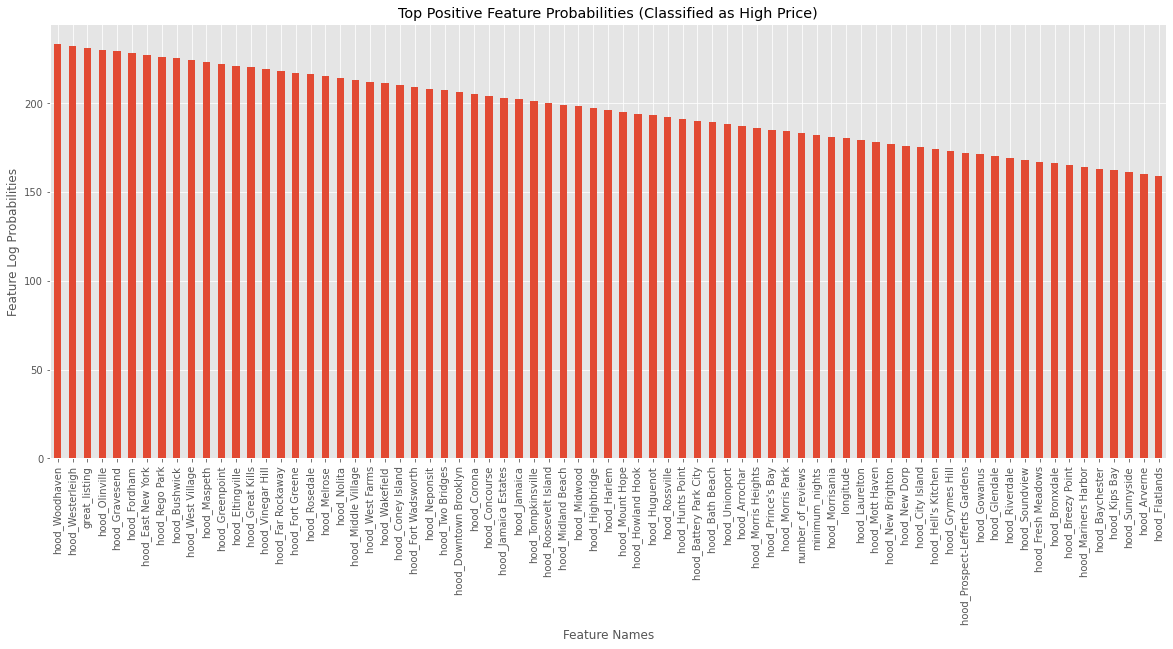

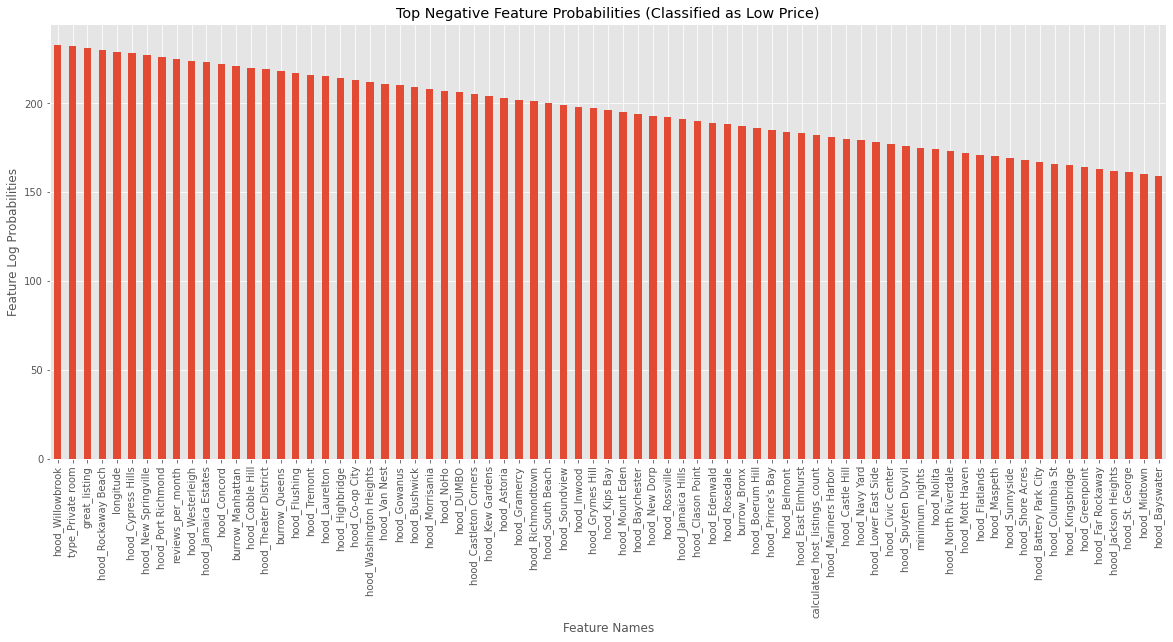

In [ ]:
#Bernoulli Naive Bayes Estimator Positive features
#Use optimal recall Naive Bayes since that was determined to be the more advantageous model
NBclassifierEst = Bnb_recall.best_estimator_
pos_class_prob_sorted = NBclassifierEst.feature_log_prob_[1,:].argsort()

NBclassifierEst.fit(scaled_Xc, yc)

weights = pos_class_prob_sorted
feature_names = cdata.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights})
linreg_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Positive Feature Probabilities (Classified as High Price)")
ax.set_ylabel("Feature Log Probabilities")
ax.set_xlabel("Feature Names")
plt.show()

weights = neg_class_prob_sorted
feature_names = cdata.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names,'weights':weights})
linreg_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Negative Feature Probabilities (Classified as Low Price)")
ax.set_ylabel("Feature Log Probabilities")
ax.set_xlabel("Feature Names")
plt.show()

The Bernoulli Naive Bayes classifier classified price into two classes, "High" which is associated with the positive probabilities, and "Low" which is associated with the negatiave probabilities. It is interesting that the individual neighborhoods are so important for the classification. This makes sense though considering that the Bernoulli Naive Bayes uses binary features to classify and these neighborhoods are encoded with 0 and 1's. Some neighborhoods have very few listings in them. It is the case that some of these neighborhoods have single digit listings in them where 90%+ of them are all listed as the same class. This would mean that a neighborhood with only 5 listings, where they are all "Low" price, the BNB classifier would heavily weight any other listing in this neighborhood to "Low". There is a good chance that regardless of other attributes, since the place is in that neighborhood it will still be "Low".

 Private room and great listing variables are highly important which makes sense given that people are more likely to pay more for their own room and a great place. And less likely to pay as much for a public room that is not considered a great place. 

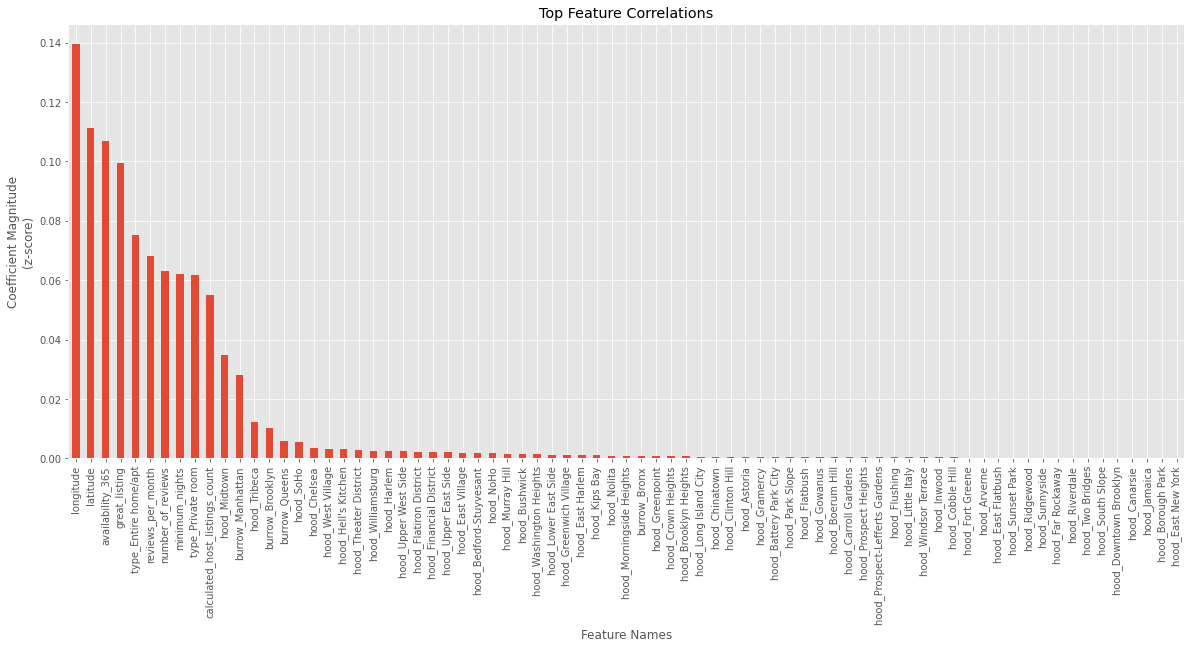

In [ ]:
#RF Classification Estimator
#Use RF model that was optimized for accuracy as that was determined to be the more advantageous model for this task
from sklearn.ensemble import RandomForestClassifier
RFclassifierEst = RF_accuracy
RFclassifierEst.fit(scaled_Xc, yc)

weights = RFclassifierEst.feature_importances_.ravel()
feature_names = cdata.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

Based on our RF classifier, the features that are most important are longitude, latitude, availabity_365, great_listing, and type.

Longitude and latitude having the most impact on the classifier is a bit interesting. Presumably this has to do with certain longitude and latitudes being closer to the middle of the city where the tourist attractions are and those coordinates outside the city, which have lower prices, where there are less things to do.

Availability_365 makes sense as that should be highly correlated with price since places that are more available are probably cheaper places and those less available are more expensive.

Finally, having a great_listing score is more associated with higher price since better places are more expensive. And the type of place is also a good indicator of price since full houses are more expensive than smaller apartments.

It is interesting that no individual neighborhood had that big of an impact, but collectively we feel they are still important.


**New material:** Classifier Attribute Comparison between Bernoulli Naive Bayes and Random Forest Classifier

**Classifier Attribute Comparison:**

The above graphs plot the feature importance for both the Bernoulli Naive Bayes and also the Random Forest classifier. Our third classification task was a KNN. Since KNN is dependent on grouping around nearest neighbors for its classification, feature importance is not able to be gleaned. 

We can clearly see that the BNB important features differ quite a lot from our RF model. In the Bernoulli classifier individual neighborhoods are of great importance for classifying price as "High" or "Low". Our hypothesis is that this is because of the Bernoulli Naive Bayes algorithm which is dependent on prior probabilities. So in neighborhoods that are very lopsided, either many "Low" prices or many "High" prices, have a tendency to weight these features extremely high and classify that listing in accordance to what the other listings are in that neighborhood.

In contrast our Random Forest classifier showed that longitude, latitude, availability_365 were all really important. No individual neighborhoods were in the top 11 features in importance. This tells us that while the Random Forest is still using the information it gets from neighborhood, it is not weighting the prior prices from the each neighborhood as much as the Bernoulli model is. 



# Deployment

 <small>*How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*</small>

**Classification Task Deployment:<BR>**
 Our Random Forest classifier is very useful for accurately assessing the quality of an Airbnb property. Our classifier could be used in order to implement a 'premium listing' filter on the Airbnb application. The value of this model can be assessed by several metrics. We can perform 
 A/B testing with this filter to see if booking rates improve and the average time to make a booking. We should be consistently collecting data from new listings, as well as new reviews from previous listings and use them to constantly our model. There may be cases in which we have to reclassify previously classified properties if we have new significant information about the properties. 

**Regression Task Deployment:<BR>**
The type of deployment for price regression is important for Airbnb in helping hosts find a suggested price the same way eBay does when you list an item for sale. On eBay the default price is based on a model that takes into account, demand and item properties. Airbnb is not this advanced, yet should be. This could be beneficial to new listers or struggling listers that perhaps are not seeing the amount of guests as desired due to greater error compared to the model predictions. Because speed and accuracy is important, a super fast and high-performing model like the Random Forest Regressor should be deployed in the backend of their application. We should consistently be doing market research to dictate whether our model may require updating (e.g. we may find our model may need updating on a seasonal basis due to supply and demand changes for Airbnb listings in certain locations). 


# Exceptional Work

**Old Code that is not corrected due to not be able to count toward re-submission**

In [ ]:
import seaborn as sns

knn_cv_df = pd.DataFrame.from_dict(gs_results.cv_results_)
knn_hp_plot = sns.lineplot(data=knn_cv_df, x='param_n_neighbors', y='mean_test_score', 
             hue='param_metric', style = 'param_weights', 
             markers = True)

sns.set(rc={'figure.figsize':(20,10)})
knn_hp_plot.set(ylabel='Accuracy', xlabel='N-Neighbors')
plt.show()

**Grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most signiﬁcant for making a good model for each classiﬁcation algorithm?**

The plot above depicts how our accuracy changes as we change our hyperparameters. It appears that using Jaccard distance as our distance measure hinders our model performan substantially when compared to Euclidean and Manhattan distance measures. Also, uniform paramater weights appear to perform better across board when compared to distance weights. As our number of neighbors increase, so does our accuracy, unaninimously, irregardless of other hyperparamter settings, although it appears we reach an "elbow point" in our accuracy at around k = 10. 